In [1]:
using LinearAlgebra 
using Kronecker
using Plots
using Random, Distributions


(process:26736): GLib-GIO-WARNING **: 13:42:18.766: Unexpectedly, UWP app `KDEe.V.Okular_22.401.1031.0_x64__7vt06qxq7ptv8' (AUMId `KDEe.V.Okular_7vt06qxq7ptv8!KDEe.V.Okular') supports 5 extensions but has no verbs


In [2]:
X = [0 1 ; 1 0 ];
Y = [0 -1im ; im 0 ];
Z = [1 0 ; 0 -1 ];


H=1/sqrt(2)*[1 1 ; 1 -1];

S=[1 0; 0 im];
T=[1 0; 0 exp(im*pi/4)];



function RX(r)
    exp(-im*r/2*X)
end

function RY(r)
    exp(-im*r/2*Y)
end

function RZ(r)
    exp(-im*r/2*Z)
end


CNOT=[1 0 0 0; 0 1 0 0; 0 0 0 1; 0 0 1 0];
REVCNOT=kronecker(H, H)*CNOT*kronecker(H, H);

In [5]:
#The Random Field (Note the required Nesting):


RU=fill(fill(0.1+im, 2,2), 12); #Random Unitary

RH1=fill(fill(0.1+im, 2,2), 12); #NOTE: These two are Random Hermitian at this stage


RU1=fill(fill(0.1+im, 2,2), 12); #NOTE: These will be generated later from above



#Generating a GUE:

l = Normal(0, 0.50);   #off diagonal elements
d = Normal(0, 1.00);   #diagonal elements


for j in 1:length(RU)
    
    
    A=rand(l,2,2)+im*rand(l,2,2);
    for i in 1:dim(A)
        A[i,i]=rand(d)+im*rand(d);
    end
    
#Symmetrisation and Exponentiation:
    
    A=(A+A')/2;
    Unew=exp(im*A);
    
    RU[j]=Unew;
end





#Generating the set of controlabe Hermitian:

l = Normal(0, 0.50);   #off diagonal elements
d = Normal(0, 1.00);   #diagonal elements


for j in 1:length(RU)
    
    
    A=rand(l,2,2)+im*rand(l,2,2);
    for i in 1:dim(A)
        A[i,i]=rand(d)+im*rand(d);
    end
    
#Symmetrisation:
    
    RH1[j]=(A+A')/2;
end




In [6]:
ZRow=copy(kronecker(RU[1],RU[2],RU[3],RU[4],RU[5],RU[6],RU[7],RU[8],RU[9],RU[10],RU[11],RU[12]));

In [13]:
 
FU=fill(fill(0.1+im, 4,4), 6);
ordpar=fill(0.1,157);

#Looping:

for al in 1:length(ordpar)
    
    alpha=0.02*(al-1);
       
    for j in 1:length(RU)
        RU1[j]=exp(im*alpha*RH1[j]);
    end
       
    
    for j in 1:length(FU)
        FU[j]=CNOT*kronecker(RU1[j],RU1[j+6])*CNOT;
    end
    
    
    
    UOdd=copy(kronecker(FU[1],FU[2],FU[3],FU[4],FU[5],FU[6]));
    UEven=copy(kronecker(I(2),FU[2],FU[3],FU[4],FU[5],FU[6],I(2)));

    A=UEven*UOdd*ZRow
    
   
    
    EigA=eigvals(A);
    N=fill(0.1,length(EigA))


        for i in 1:length(EigA)
            N[i]=real(log(EigA[i])/(-im));
        end

    N= sort(N,rev=true);
    EigA1=copy(N);
    ls = deleteat!(EigA1,1);
    la = deleteat!(N,length(N));
    m=copy(la-ls)/mean(la-ls)
    
    
    
    
    n=fill(0.1,length(EigA)-2);

        for i in 1:length(n)
            #n[i]=m[i+1]/m[i];
            n[i]= minimum([m[i], m[i+1]])/maximum([m[i], m[i+1]]);
        end

    ordpar[al]=mean(n);
end
    
    
    
    
    
    



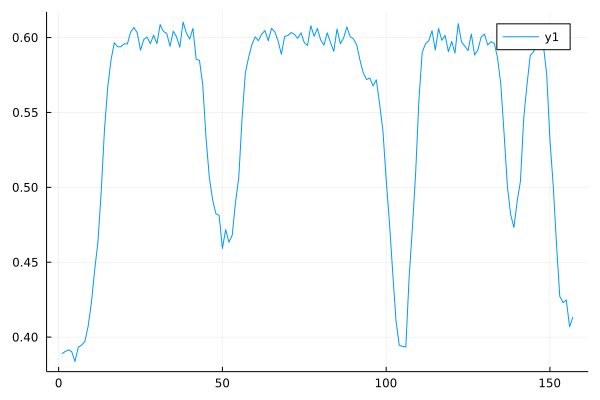

In [15]:
xax=1:length(ordpar)
plot(xax,ordpar)

In [16]:
gr()

plot(xax,ordpar)

savefig("tuning_full scan.png")

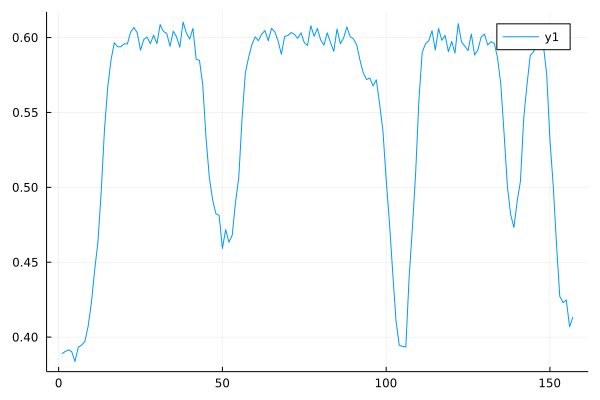

In [17]:
plot(xax,ordpar)
